# Analysis of Data

# Global Variables
Any global variable that we should use to configure the analysis

In [32]:
# Any global variables
cut_start=100
cut_end=900

# Load Data
## Load Excel Data

In [2]:
# Sleeve Stress Analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
from pathlib import Path

file_name = 'Testinfo.xlsx'

#Save Sensor ID infomration
xl_file = pd.ExcelFile(file_name)
tabnames=xl_file.sheet_names

data=xl_file

sleeveid=xl_file.parse(sheet_name=data.sheet_names[0], skiprows=0)
sheet=sleeveid

sleeveid.set_index(keys='SleeveID')
slmelt=sleeveid.melt('SleeveID', var_name="Pos ID",value_name="Location").dropna()
slmelt.head()

# library & dataset
import seaborn as sns
df=slmelt
     
# --- Use the 'palette' argument of seaborn
sns.lmplot( y="Location", x="SleeveID", data=df, fit_reg=False, hue='Pos ID', legend=False, palette="Set1")
plt.legend(loc='lower right',frameon=True)
plt.ylim(ymax=2700) 
# --- Use a handmade palette
#flatui = ["#9b59b6", "#3498db", "orange"]
#sns.set_palette(flatui)
#sns.lmplot( x="sepal_length", y="sepal_width", data=df, fit_reg=False, hue='species', legend=False)

df.head()

,SleeveID,Pos ID,Location
0,3,A,360.0
1,4,A,360.0
2,5,A,538.0
3,6,A,589.0
4,7,A,264.0


## Load Runinfo

In [2]:
runinfo=xl_file.parse(sheet_name=data.sheet_names[1], skiprows=0)
sheet=runinfo

runinfo.set_index(['Run','SleeveID'],inplace=True)
#slmelt=runinfo.melt('SleeveID', var_name="Pos ID",value_name="Location").dropna()
#slmelt.head()

runinfo.head(8)

Location
Run SleeveID         
2   5              R1
    6              R2
    7              R3
    8              R4
    9              R5
3   5              R6
    6              R7
    7              R8

# Initializes Runinfo

This portion prepares a table with all the runinfo that is wanted to be saved

In [291]:
TestSeries='Test Series'
Run=1
Notes='No Flow'
NomFlow=0
AvgFlow=0
Start=5
Stop=10
runlabel=['Test Series','Run','Notes','Nom Flow','Avg Flow','Lower Range','Upper Range']
runinfo=[TestSeries,Run,Notes,NomFlow,AvgFlow,Start,Stop]
df_runinfo=pd.DataFrame()
for label,info in zip(runlabel,runinfo):
    df_runinfo.loc[1,label]=info
df_runinfo


,Test Series,Run,Notes,Nom Flow,Avg Flow,Lower Range,Upper Range
1,Test Series,1.0,No Flow,0.0,0.0,5.0,10.0


## Create Data
This routine creates artificial data for testing purposes

In [4]:


#df=pd.DataFrame({'t': range(1,11), 'y1': np.random.randn(10), 'y2': np.random.randn(10)+range(1,11), 'y3': np.random.randn(10)+range(11,21), 'y4': np.random.randn(10)+range(6,16), 'y5': np.random.randn(10)+range(4,14)+(0,0,0,0,0,0,0,-3,-8,-6), 'y6': np.random.randn(10)+range(2,12), 'y7': np.random.randn(10)+range(5,15), 'y8': np.random.randn(10)+range(4,14) })
# create list of all of all sleeveID in Run 2
#runinfo.loc[runinfo['Run']=='2'].head()
#qry=runinfo.query('Run ==2')
#for tpl in qry.index.values
#    slvid=tpl[1]
#    name=sl
#    df.

def MakeData():
    df=pd.DataFrame({'t': range(1,11)})
    df.set_index(['t'],inplace=True)

    for num in range(2):
        labely = (str(num),'A','y')
        labelx = (str(num),'A','x')
        labelbx = (str(num),'B','x')
        labelby = (str(num),'B','y')
        df[labelx]= np.random.randn(10)
        df[labelbx]= np.random.randn(10)
        df[labely]= np.random.randn(10)+range(1,11)
        df[labelby]= np.random.randn(10)+range(1,11)
    #    if num==1:
    #        labelcx = (str(num),'C','x')
    #        df[labelcx]= np.random.randn(10)

    df.columns = pd.MultiIndex.from_tuples(df.columns, names=['ID','Location','Direction']) 
    df.sort_index(level='ID',axis=1,inplace=True)
    return df
    
df=MakeData()
df.head()

ID                0                                       1            \
Location          A                   B                   A             
Direction         x         y         x         y         x         y   
t                                                                       
1         -1.512440  0.886378  0.721932  0.179974 -3.006425  1.392616   
2         -0.495290  1.294371 -1.710583  1.854395  1.887814 -0.108901   
3          1.456768  2.526669 -1.949844  3.424698  0.857403  3.996071   
4         -0.447800  3.388852 -0.075787  4.139882 -0.864803  4.244370   
5          0.147154  4.864453  1.970408  5.413809 -0.318998  6.840373   

ID                             
Location          B            
Direction         x         y  
t                              
1          0.773993  1.868145  
2          0.402237  2.458151  
3         -1.943279  2.688403  
4          0.824372  2.101502  
5          0.467706  6.226221

## Loads and Conconcatenates CSV Files

\\FS01\Data\Data\Engineering\Teams\Prototyping\Test Specifications & Protocols\Signa 4&6 Row Wiper Design Upgrade 2018 JS\Strain gauge sleeve testing\data\Test1213MGD\2018-08-03 10-00-51_0.tdms


,Time,Slv1 A1-A3,Slv1 A2-A4,Slv1 B1-B3,Slv1 B2-B4,Slv1 C1-C3,Slv1 C2-C4,Slv1 D1-D3,Slv1 D2-D4,Slv1 E1-E3,...,Slv4 E1-E3,Slv4 E2-E4,Slv5 C1-C3,Slv5 C2-C4,Slv6 C1-C3,Slv6 C2-C4,Slv 10 C1-C3,Slv10 C2-C4,Slv11 C1-C3,Slv11 C2-C4
0,2018-08-03 14:00:50.818276,-3.141391,3.432586,6.225670,4.038254,-4.367450,6.071185,-7.605007,3.966814,-0.247775,...,-3.040235,-3.684215,-9.361383,-0.110477,0.0,0.0,-11.366507,-0.242544,-7.526252,-3.690875
1,2018-08-03 14:00:50.818776,-3.059876,4.039567,7.462195,3.731964,-4.480151,6.408868,-7.258450,3.186268,-0.165444,...,-2.916595,-2.995187,-9.302345,-0.815834,0.0,0.0,-11.310308,0.210063,-8.192647,-4.199417
2,2018-08-03 14:00:50.819276,-2.874360,3.887822,8.749305,4.740754,-4.871784,6.915394,-7.362699,3.422968,-0.030561,...,-3.118915,-3.920453,-9.676251,-0.711857,0.0,0.0,-10.669650,-0.132906,-7.059494,-3.910025
3,2018-08-03 14:00:50.819776,-2.188513,3.929973,7.726362,4.631164,-4.812616,6.636805,-7.697986,3.039739,-0.302079,...,-4.116465,-4.699476,-9.620025,0.223935,0.0,0.0,-10.484197,0.595201,-6.671467,-3.089616
4,2018-08-03 14:00:50.820276,-2.857495,3.772608,7.984908,4.597444,-5.266235,6.031788,-8.444633,1.689985,-0.748770,...,-3.515125,-3.051434,-9.709987,-0.610691,0.0,0.0,-9.469820,0.350625,-6.384664,-2.937896
5,2018-08-03 14:00:50.820776,-2.157594,4.191312,8.513241,5.465734,-5.728306,5.612497,-8.994053,2.831218,-0.249527,...,-3.284704,-2.680203,-9.608780,-0.175111,0.0,0.0,-11.616589,-0.051381,-7.770878,-4.106699
6,2018-08-03 14:00:50.821276,-2.292514,4.281235,10.098241,4.743564,-5.150717,5.668778,-7.526116,2.360635,-0.531556,...,-3.428015,-5.053833,-9.243308,-0.256607,0.0,0.0,-10.995599,-0.669851,-8.403531,-4.067364
7,2018-08-03 14:00:50.821776,-3.464638,3.362334,7.411610,4.361404,-4.761901,5.862947,-8.616503,1.735071,-0.358134,...,-2.551295,-2.503024,-8.706346,0.412218,0.0,0.0,-10.947831,0.311267,-7.689336,-4.095460
8,2018-08-03 14:00:50.822276,-3.020524,3.865341,7.369456,4.215284,-5.167622,6.273795,-7.802235,2.619878,-0.254782,...,-4.279445,-3.478913,-8.835667,-0.245366,0.0,0.0,-11.130475,-0.200376,-7.177589,-3.926883
9,2018-08-03 14:00:50.822776,-2.551113,3.401675,8.347434,4.091644,-4.257567,7.638600,-6.018734,3.501868,-0.533307,...,-3.621905,-3.912016,-8.934063,0.215505,0.0,0.0,-11.040558,-0.138529,-7.748384,-4.783818


# Data Manipulation
## Adds Total Stress Columns

In [35]:
#df=df.stack(level='Direction')

for id,loc,dir in df.columns.values:
    df[(id,loc,'tot')]=(df[(id,loc,'x')]**2+df[(id,loc,'y')]**2)**.5
df.sort_index(level='ID',axis=1,inplace=True)
df.head()

ID                0                                                    \
Location          A                             B                       
Direction         x         y       tot         x         y       tot   
t                                                                       
1         -1.512440  0.886378  1.753038  0.721932  0.179974  0.744027   
2         -0.495290  1.294371  1.385897 -1.710583  1.854395  2.522870   
3          1.456768  2.526669  2.916544 -1.949844  3.424698  3.940868   
4         -0.447800  3.388852  3.418310 -0.075787  4.139882  4.140576   
5          0.147154  4.864453  4.866678  1.970408  5.413809  5.761235   

ID                1                                                    
Location          A                             B                      
Direction         x         y       tot         x         y       tot  
t                                                                      
1         -3.006425  1.392616  3.313302  0.773993  1.868145  2.022135  
2          1.887814 -0.108901  1.890953  0.402237  2.458151  2.490843  
3          0.857403  3.996071  4.087019 -1.943279  2.688403  3.317204  
4         -0.864803  4.244370  4.331577  0.824372  2.101502  2.257410  
5         -0.318998  6.840373  6.847807  0.467706  6.226221  6.243763

# Interactive list

In [10]:
max(df.index.values)
min(df.index.values)

1

In [31]:
from ipywidgets import interact
import ipywidgets as widgets
import matplotlib.pyplot as plt
%matplotlib inline

colnames={}
prevname=''
for id,loc,_ in df.columns.values:
    name=str(id)+loc
    if(prevname!=name):
        nametupl=(id,loc)
        colnames[name]=nametupl
        prevname=name
        
def plot_func(titles,start,stop):
    fig,ax=plt.subplots(1,1)
    #ax=plt.scatter(x=df.index.values,y=df.index.values)
    ax.plot(df.index.values,df.index.values)
    ymin,ymax=plt.ylim()
    xmin,xmax=plt.xlim()
    x1=[xmin, xmin, start,start]
    x2=[stop,stop, xmax,xmax]
    y1=[ymin,ymax,ymax,ymin]
    ax.fill(x1,y1,"b",alpha=.3)
    ax.fill(x2,y1,"b",alpha=.3)
    plt.title(titles)
    plt.show()

#interact(f, x=['apples','oranges']);

ts=df.index.values
mints=min(ts)
maxts=max(ts)
int=interact(plot_func, titles=colnames, start=(mints,maxts,1),stop=(mints,maxts,1));

fl=widgets.FloatRangeSlider(
    value=[5, 7.5],
    min=min(df.index.values),
    max=max(df.index.values),
    step=0.1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)

interactive(children=(Dropdown(description='titles', options={'0A': ('0', 'A'), '0B': ('0', 'B'), '1A': ('1', 'A'), '1B': ('1', 'B')}, value=('0', 'A')), IntSlider(value=5, description='start', max=10, min=1), IntSlider(value=5, description='stop', max=10, min=1), Output()), _dom_classes=('widget-interact',))

In [219]:
df.index.values

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [45]:
print (colnames)
for col,nam in colnames:
    print (col,nam)

{'0A': ('0', 'A'), '0B': ('0', 'B'), '1A': ('1', 'A'), '1B': ('1', 'B')}
0 A
0 B
1 A
1 B


# Plot data

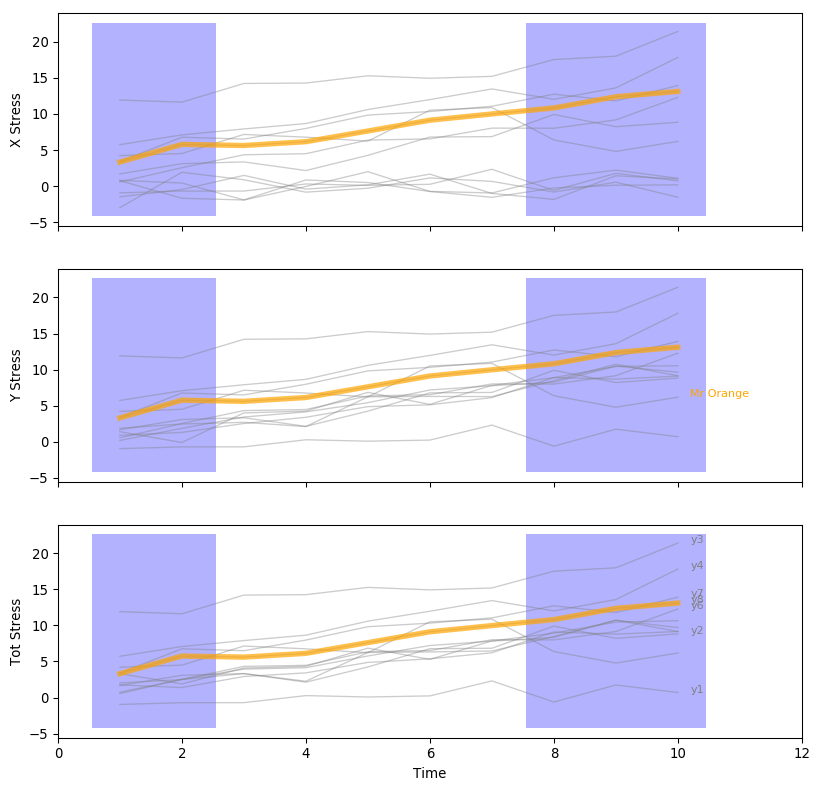

In [39]:
# libraries and data

from ipywidgets import interact
import ipywidgets as widgets
import matplotlib.pyplot as plt
%matplotlib inline


dfy=pd.DataFrame({'t': range(1,11), 'y1': np.random.randn(10), 'y2': np.random.randn(10)+range(1,11), 'y3': np.random.randn(10)+range(11,21), 'y4': np.random.randn(10)+range(6,16), 'y5': np.random.randn(10)+range(4,14)+(0,0,0,0,0,0,0,-3,-8,-6), 'y6': np.random.randn(10)+range(2,12), 'y7': np.random.randn(10)+range(5,15), 'y8': np.random.randn(10)+range(4,14) })

#plt.style.use('fivethirtyeight')
#plt.style.use('seaborn-darkgrid')
my_dpi=96
plt.close('all')

def choose_data(df):
    figprops = dict(figsize=(960/my_dpi, 960/my_dpi), dpi=my_dpi)
    fig, (ax, bx,totx) = plt.subplots(nrows=3,sharex=True,sharey=True,**figprops)

    colnames={}
    prevname=''
    for id,loc,_ in df.columns.values:
        name=str(id)+loc
        if(prevname!=name):
            nametupl=(id,loc)
            colnames[name]=nametupl
            prevname=name
    
    
    
    # multiple line plot
    for column in dfy.drop('t', axis=1):
        ax.plot(dfy['t'], dfy[column], marker='', color='grey', linewidth=1, alpha=0.4)
        bx.plot(dfy['t'], dfy[column], marker='', color='grey', linewidth=1, alpha=0.4)
        totx.plot(dfy['t'], dfy[column], marker='', color='grey', linewidth=1, alpha=0.4)

    for key, value in colnames.items():
        id,loc=value
        ax.plot(df.index.values, df[(id,loc,'x')], marker='', color='grey', linewidth=1, alpha=0.4)
        bx.plot(df.index.values, df[(id,loc,'y')], marker='', color='grey', linewidth=1, alpha=0.4)
        totx.plot(df.index.values, df[id,loc,'tot'], marker='', color='grey', linewidth=1, alpha=0.4)   

    # Now re do the interesting curve, but biger with distinct color
    ax.plot(dfy['t'], dfy['y8'], marker='', color='orange', linewidth=4, alpha=0.7)
    bx.plot(dfy['t'], dfy['y8'], marker='', color='orange', linewidth=4, alpha=0.7)
    totx.plot(dfy['t'], dfy['y8'], marker='', color='orange', linewidth=4, alpha=0.7)

    fill_area(ax,bx,totx)

    # And add a special annotation for the group we are interested in

    bx.text(10.2, dfy.y5.tail(1), 'Mr Orange', horizontalalignment='left', size='small', color='orange')

    # Let's annotate the plot
    num=0
    for i in dfy.values[9][1:]:
       num+=1
       name=list(dfy)[num]
       if name != 'y5':
          totx.text(10.2, i, name, horizontalalignment='left', size='small', color='grey')

    # Configure Axis Limits
    ax.set_xlim(0,12)  

    # Label Axis        
    ax.set_ylabel("X Stress")   
    bx.set_ylabel("Y Stress")   
    totx.set_ylabel("Tot Stress") 
    totx.set_xlabel("Time")
    plt.show()
    
def fill_area(ax,bx,totx):
        #fill sizes
    ymin,ymax=plt.ylim()
    xmin,xmax=plt.xlim()
    start=xmin+2
    stop=start+5
    x1=[xmin, xmin, start,start]
    x2=[stop,stop, xmax,xmax]
    y1=[ymin,ymax,ymax,ymin]
    ax.fill(x1,y1,"b",alpha=.3)
    ax.fill(x2,y1,"b",alpha=.3)
    bx.fill(x1,y1,"b",alpha=.3)
    bx.fill(x2,y1,"b",alpha=.3)
    totx.fill(x1,y1,"b",alpha=.3)
    totx.fill(x2,y1,"b",alpha=.3)
    
    
choose_data(df)

# Calculate Section Stat

This portion calculates all the stats that need to be done. 

In [297]:
def dir_str(dir):
    du=dir.upper()
    if(du=='X'):
        dirname='Inflow'
    elif(du=='Y'):
        dirname='Crossflow'
    elif(du=='TOT'):
        dirname='Tot'
    else:
        dirname=''
    return dirname

info=[]
for id,loc,dir in df_psi.columns.values:
    tupl=id,loc
    info.append(tupl)
info=list(set(info))


df_stat=pd.DataFrame(columns=['info'])
df_stat['info']=info
df_stat['Run']=Run
df_stat.set_index('info',inplace=True)
for id,locat,dir in df_psi.columns.values:
    info1=(id,locat)
    dn=dir_str(dir)
    df_stat.loc[info1,dn+' Mean']=df_psi[id,locat,dir].mean()
    df_stat.loc[info1,dn+' Stdev']=df_psi[id,locat,dir].std()
    df_stat.loc[info1,dn+' Max']=df_psi[id,locat,dir].max()
    df_stat.loc[info1,dn+' Min']=df_psi[id,locat,dir].min()
    df_stat.loc[info1,dn+' RMS']=((df_psi[id,locat,dir]**2).mean())**.5

df_stat.head()

,Run,Inflow Mean,Inflow Stdev,Inflow Max,Inflow Min,Inflow RMS,Crossflow Mean,Crossflow Stdev,Crossflow Max,Crossflow Min,Crossflow RMS,Tot Mean,Tot Stdev,Tot Max,Tot Min,Tot RMS
info,,,,,,,,,,,,,,,,
"(1, B)",1,-4.802630,7.159982,1.436748,-15.786917,8.004844,81.757362,19.271816,107.354867,62.555970,83.554704,82.257550,18.680258,107.359086,63.278130,83.937275
"(0, B)",1,5.285575,13.514837,21.848986,-9.766545,13.193103,86.625255,13.682857,104.862904,71.708273,87.485492,87.548219,14.277547,107.114924,72.106155,88.474682
"(1, A)",1,-0.358300,11.281411,11.041381,-15.794218,10.096760,85.687348,22.103051,105.295475,51.738985,87.938373,86.313022,21.942089,106.473444,52.904014,88.516112
"(0, A)",1,2.181663,15.730648,16.336771,-18.687052,14.238057,75.821517,18.350969,91.026966,51.166057,77.577760,77.220979,17.956600,91.531865,53.710850,78.873514


In [293]:
df_runinfo

,Test Series,Run,Notes,Nom Flow,Avg Flow,Lower Range,Upper Range
1,Test Series,1.0,No Flow,0.0,0.0,5.0,10.0


# Concatonates Runinfo to Stats

This sequence adds fills the repeated information into the stats summary file


In [301]:
merged=pd.merge(left=df_runinfo,right=df_stat, how='right', left_on='Run', right_on='Run')
merged


,Test Series,Run,Notes,Nom Flow,Avg Flow,Lower Range,Upper Range,Inflow Mean,Inflow Stdev,Inflow Max,...,Crossflow Mean,Crossflow Stdev,Crossflow Max,Crossflow Min,Crossflow RMS,Tot Mean,Tot Stdev,Tot Max,Tot Min,Tot RMS
0,Test Series,1,No Flow,0.0,0.0,5.0,10.0,-4.802630,7.159982,1.436748,...,81.757362,19.271816,107.354867,62.555970,83.554704,82.257550,18.680258,107.359086,63.278130,83.937275
1,Test Series,1,No Flow,0.0,0.0,5.0,10.0,5.285575,13.514837,21.848986,...,86.625255,13.682857,104.862904,71.708273,87.485492,87.548219,14.277547,107.114924,72.106155,88.474682
2,Test Series,1,No Flow,0.0,0.0,5.0,10.0,-0.358300,11.281411,11.041381,...,85.687348,22.103051,105.295475,51.738985,87.938373,86.313022,21.942089,106.473444,52.904014,88.516112
3,Test Series,1,No Flow,0.0,0.0,5.0,10.0,2.181663,15.730648,16.336771,...,75.821517,18.350969,91.026966,51.166057,77.577760,77.220979,17.956600,91.531865,53.710850,78.873514


# Read and Write Data to Excel
This will save the data to Excell

ID                0                       1            
Location          A           B           A           B
count     15.000000   15.000000   15.000000   15.000000
mean      51.741386   59.819683   57.214024   53.070761
std       39.688741   41.919801   45.708200   44.886425
min      -18.687052   -9.766545  -15.794218  -15.786917
25%       15.192802   16.590089    8.664025    1.194267
50%       61.160741   77.599264   78.184036   63.278130
75%       88.441714   89.864949   96.811751   88.060997
max       91.531865  107.114924  106.473444  107.359086